In [266]:
import pandas as pd
import re

# Import the CSV file
df = pd.read_csv('twitter_sentiment_data.csv')

# Rename columns
df.rename(columns={'sentiment': 'label', 'message': 'text'}, inplace=True)

# Delete the 'tweetid' column
df.drop(columns=['tweetid'], inplace=True)

# Adjust labels by adding 1 to each label
df['label'] = df['label'] + 1

# Add 'label_name' based on the 'label' values
df['label_name'] = df['label'].map({3: 'News', 2: 'Pro', 1: 'Neutral', 0: 'Anti'})

# Check the modified DataFrame
df.head()

,label,text,label_name
0,0,@tiniebeany climate change is an interesting h...,Anti
1,2,RT @NatGeoChannel: Watch #BeforeTheFlood right...,Pro
2,2,Fabulous! Leonardo #DiCaprio's film on #climat...,Pro
3,2,RT @Mick_Fanning: Just watched this amazing do...,Pro
4,3,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",News


In [258]:
import html
html.unescape(df['text'][21])

"RT @antonio5591: Florida,Trump defied Cuba embargo&lied to you about it.Also,he doesn't believe in climate change which will affectÃ¢â‚¬Â¦"

In [358]:
df['text'][21]

'florida trump defied cuba embargo lied believe climate change'

In [264]:
import re
import html

def clean_text(text):
    # Decode HTML entities
    text = html.unescape(text)
    # Remove words containing "Ã"
    text = re.sub(r'\b\w*Ã\w*\b', '', text)
    # Fix encoding issues
    text = text.encode('latin1', errors='ignore').decode('utf-8', errors='ignore')
    # Add space after punctuation if not followed by space
    text = re.sub(r'([.,!?&])(?=\S)', r'\1 ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the function to the 'text' column
df['text'] = df['text'].apply(clean_text)

In [308]:
df['text'][3966]

"RT @People4Bernie: We are all Zach: 'You and your friends will die of old age &amp; IÃ¢â‚¬â„¢m going to die from climate change.'\nhttps://t.co/r425dcmÃ¢â‚¬Â¦"

In [333]:
df['text'][3958]

'liberal tears soon beat climate change leading cause rising sea levels'

In [9]:
# Function to clean text
def clean_text(text):
    # Remove words containing the specific character sequence
    text = re.sub(r'\S*ÃƒÂ¢Ã¢â€šÂ¬Ã‚Â\S*', '', text)
    # Remove URLs (http, https, www)
    text = re.sub(r'http[s]?://\S+|www\.\S+', '', text)
    # Remove @mentions (usernames)
    text = re.sub(r'@[\w]+', '', text)  # Remove @username
    # Remove RT and retweet mention
    text = re.sub(r'\bRT\b', '', text)  # Remove RT
    # Remove non-ASCII characters (including special characters)
    text = ''.join([char for char in text if ord(char) < 128])  # Keep only ASCII characters
    # Remove special characters and unwanted symbols
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)  # Keep only alphanumeric characters and spaces
#     Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the cleaning function to the 'text' column
df['text'] = df['text'].apply(clean_text)

In [10]:
# Save the modified DataFrame to a new CSV file
df.to_csv('modified_file.csv', index=False)

## Using the NeatText Package

The NeatText Python package can be found here: https://github.com/Jcharis/neattext/wiki

In [1]:
!pip install neattext

  Obtaining dependency information for neattext from https://files.pythonhosted.org/packages/ca/69/320062a5980ec9b6383bb9caf2a335e0f177164a2e7dd1d98f967b07e1c7/neattext-0.1.3-py3-none-any.whl.metadata
   ---------------------------------------- 0.0/114.7 kB ? eta -:--:--
   ------ -------------------------------- 20.5/114.7 kB 640.0 kB/s eta 0:00:01
   ---------------------------------------- 114.7/114.7 kB 1.3 MB/s eta 0:00:00


In [1]:
import neattext as nt
import neattext.functions as nfx

In [96]:
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [2]:
import pandas as pd
import re

# Import the CSV file
df = pd.read_csv('twitter_sentiment_data.csv')

# Rename columns
df.rename(columns={'sentiment': 'label', 'message': 'text'}, inplace=True)

# Delete the 'tweetid' column
df.drop(columns=['tweetid'], inplace=True)

# Adjust labels by adding 1 to each label
df['label'] = df['label'] + 1

# Add 'label_name' based on the 'label' values
df['label_name'] = df['label'].map({3: 'News', 2: 'Pro', 1: 'Neutral', 0: 'Anti'})

# Check the modified DataFrame
df.head()

C:\Users\nawaf\AppData\Roaming\Python\Python311\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


,label,text,label_name
0,0,@tiniebeany climate change is an interesting h...,Anti
1,2,RT @NatGeoChannel: Watch #BeforeTheFlood right...,Pro
2,2,Fabulous! Leonardo #DiCaprio's film on #climat...,Pro
3,2,RT @Mick_Fanning: Just watched this amazing do...,Pro
4,3,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",News


In [3]:
df['text']

0        @tiniebeany climate change is an interesting h...
1        RT @NatGeoChannel: Watch #BeforeTheFlood right...
2        Fabulous! Leonardo #DiCaprio's film on #climat...
3        RT @Mick_Fanning: Just watched this amazing do...
4        RT @cnalive: Pranita Biswasi, a Lutheran from ...
                               ...                        
43938    Dear @realDonaldTrump,\nYeah right. Human Medi...
43939    What will your respective parties do to preven...
43940    RT @MikkiL: UN Poll Shows Climate Change Is th...
43941    RT @taehbeingextra: i still can$q$t believe th...
43942    @Likeabat77 @zachhaller \n\nThe wealthy + foss...
Name: text, Length: 43943, dtype: object

In [269]:
# Noise Scan
df['text'].apply(lambda x : nt.TextFrame(x).noise_scan()['text_noise'])

0         8.029197
1         8.904110
2        14.529915
3        11.188811
4         8.633094
           ...    
43938    10.434783
43939     7.228916
43940    11.881188
43941     7.246377
43942     9.285714
Name: text, Length: 43943, dtype: float64

In [270]:
df['text'].apply(lambda x : nt.TextFrame(x).noise_scan()['text_noise']).sum()

482560.5584000127

In [4]:
# Replace $q$ with a single quote in the message column
df['text'] = df['text'].str.replace('$q$', "'", regex=False)

In [5]:
# Extracting Userhandles
# userhandles = df['text'].apply(nfx.extract_userhandles)
# userhandles

# Removing Userhandles
df['text'] = df['text'].apply(nfx.remove_userhandles)

In [6]:
df['text']

0          climate change is an interesting hustle as i...
1        RT   Watch #BeforeTheFlood right here, as   tr...
2        Fabulous! Leonardo #DiCaprio's film on #climat...
3        RT   Just watched this amazing documentary by ...
4        RT   Pranita Biswasi, a Lutheran from Odisha, ...
                               ...                        
43938    Dear  \nYeah right. Human Mediated Climate Cha...
43939    What will your respective parties do to preven...
43940    RT   UN Poll Shows Climate Change Is the Lowes...
43941    RT   i still can't believe this gif of taehyun...
43942        \n\nThe wealthy + fossil fuel Industry kno...
Name: text, Length: 43943, dtype: object

In [7]:
#Extracting Hashtags
# hashtags = df['text'].apply(nfx.extract_hashtags)
# hashtags

# Removing Hashtags
df['text'] = df['text'].apply(nfx.remove_hashtags)

In [8]:
df['text']

0          climate change is an interesting hustle as i...
1        RT   Watch   right here, as   travels the worl...
2        Fabulous! Leonardo   film on   change is brill...
3        RT   Just watched this amazing documentary by ...
4        RT   Pranita Biswasi, a Lutheran from Odisha, ...
                               ...                        
43938    Dear  \nYeah right. Human Mediated Climate Cha...
43939    What will your respective parties do to preven...
43940    RT   UN Poll Shows Climate Change Is the Lowes...
43941    RT   i still can't believe this gif of taehyun...
43942        \n\nThe wealthy + fossil fuel Industry kno...
Name: text, Length: 43943, dtype: object

In [9]:
#Extracting URLs
# urls = df['text'].apply(nfx.extract_urls)
# urls

# Removing URLs
df['text'] = df['text'].apply(nfx.remove_urls)

In [10]:
df['text']

0          climate change is an interesting hustle as i...
1        RT   Watch   right here, as   travels the worl...
2        Fabulous! Leonardo   film on   change is brill...
3        RT   Just watched this amazing documentary by ...
4        RT   Pranita Biswasi, a Lutheran from Odisha, ...
                               ...                        
43938    Dear  \nYeah right. Human Mediated Climate Cha...
43939    What will your respective parties do to preven...
43940    RT   UN Poll Shows Climate Change Is the Lowes...
43941    RT   i still can't believe this gif of taehyun...
43942        \n\nThe wealthy + fossil fuel Industry kno...
Name: text, Length: 43943, dtype: object

In [11]:
import re
import html

def clean_text(text):
    # Decode HTML entities
    text = html.unescape(text)
    # Remove words containing "Ã"
    text = re.sub(r'\b\w*Ã\w*\b', '', text)
    # Fix encoding issues
    text = text.encode('latin1', errors='ignore').decode('utf-8', errors='ignore')
    # Add space after punctuation if not followed by space
    text = re.sub(r'([.,!?&])(?=\S)', r'\1 ', text)
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply the function to the 'text' column
df['text'] = df['text'].apply(clean_text)

In [12]:
# Removing Custom Patterns
df['text'] = df['text'].apply(lambda x : nfx.remove_custom_pattern(x, term_pattern=r'&#\S+'))
df['text'] = df['text'].apply(lambda x : nfx.remove_custom_pattern(x, term_pattern=r'RT'))

In [13]:
# Removing Contractions
df['text'] = df['text'].apply(nfx.fix_contractions)
# nfx.fix_contractions("I'm testing this, it's a test y'all, idk i cant test this")

In [14]:
df['text']

0        climate change is an interesting hustle as it ...
1          watch right here, as travels the world to ta...
2        fabulous! leonardo film on change is brilliant...
3          just watched this amazing documentary by leo...
4          pranita biswasi, a lutheran from odisha, giv...
                               ...                        
43938    dear yeah right. human mediated climate change...
43939    what will your respective parties do to preven...
43940      un poll shows climate change is the lowest o...
43941      i still cannot believe this gif of taehyung ...
43942    the wealthy + fossil fuel industry know climat...
Name: text, Length: 43943, dtype: object

In [15]:
df['text'] = df['text'].apply(nfx.remove_numbers)

In [16]:
# Removing Special Characters and Extra Spaces
df['text'] = df['text'].apply(nfx.remove_special_characters)
df['text'] = df['text'].apply(nfx.remove_multiple_spaces)

In [17]:
df['text']

0        climate change is an interesting hustle as it ...
1         watch right here as travels the world to tack...
2        fabulous leonardo film on change is brilliant ...
3         just watched this amazing documentary by leon...
4         pranita biswasi a lutheran from odisha gives ...
                               ...                        
43938    dear yeah right human mediated climate change ...
43939    what will your respective parties do to preven...
43940     un poll shows climate change is the lowest of...
43941     i still cannot believe this gif of taehyung s...
43942    the wealthy fossil fuel industry know climate ...
Name: text, Length: 43943, dtype: object

In [18]:
# Removing Stopwords

# df['text'].apply(lambda x : nt.TextExtractor(x).extract_stopwords())

# df['text'].apply(lambda x : nt.TextExtractor(x).remove_stopwords())
df['text'] = df['text'].apply(nfx.remove_stopwords, 'en')

C:\Users\nawaf\AppData\Local\Temp\ipykernel_5184\1141652326.py:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  df['text'] = df['text'].apply(nfx.remove_stopwords, 'en')


In [19]:
df['text']

0        climate change interesting hustle global warmi...
1          watch right travels world tackle climate change
2            fabulous leonardo film change brilliant watch
3        watched amazing documentary leonardodicaprio c...
4        pranita biswasi lutheran odisha gives testimon...
                               ...                        
43938    dear yeah right human mediated climate change ...
43939    respective parties prevent climate change glob...
43940    un poll shows climate change lowest global con...
43941    believe gif taehyung saved human race stopped ...
43942    wealthy fossil fuel industry know climate chan...
Name: text, Length: 43943, dtype: object

In [21]:
# Noise Scan
df['text'].apply(lambda x : nt.TextFrame(x).noise_scan()['text_noise'])

0        0
1        0
2        0
3        0
4        0
        ..
43938    0
43939    0
43940    0
43941    0
43942    0
Name: text, Length: 43943, dtype: int64

In [22]:
df['text'].apply(lambda x : nt.TextFrame(x).noise_scan()['text_noise']).sum()

0

In [23]:
df.head()

,label,text,label_name
0,0,climate change interesting hustle global warmi...,Anti
1,2,watch right travels world tackle climate change,Pro
2,2,fabulous leonardo film change brilliant watch,Pro
3,2,watched amazing documentary leonardodicaprio c...,Pro
4,3,pranita biswasi lutheran odisha gives testimon...,News


In [24]:
df.isnull().sum()

label         0
text          0
label_name    0
dtype: int64

## Oversampling Data

In [26]:
from datasets import DatasetDict

def oversample_minority_classes(dataset, label_column='label'):
    # Get the maximum class count
    class_counts = dataset[label_column].value_counts()
    max_count = class_counts.max()
    
    # Create a balanced dataset by oversampling each class to match the maximum count
    balanced_data = pd.concat(
        [dataset[dataset[label_column] == cls].sample(max_count, replace=True) for cls in class_counts.index]
    )
    
    return balanced_data.sample(frac=1).reset_index(drop=True)  # Shuffle the dataset

# Apply oversampling to each split
balanced_train_df = oversample_minority_classes(df)

In [10]:
import pandas as pd

# df = pd.read_csv('modified_file.csv')
df = pd.read_csv('twitter_sentiment_data.csv')
balanced_train_df = pd.read_csv('cleaned_twitter_sentiment_data.csv')

In [11]:
df.head()

,sentiment,message,tweetid
0,-1,@tiniebeany climate change is an interesting h...,792927353886371840
1,1,RT @NatGeoChannel: Watch #BeforeTheFlood right...,793124211518832641
2,1,Fabulous! Leonardo #DiCaprio's film on #climat...,793124402388832256
3,1,RT @Mick_Fanning: Just watched this amazing do...,793124635873275904
4,2,"RT @cnalive: Pranita Biswasi, a Lutheran from ...",793125156185137153


Text(0.5, 1.0, 'Frequency of Classes')

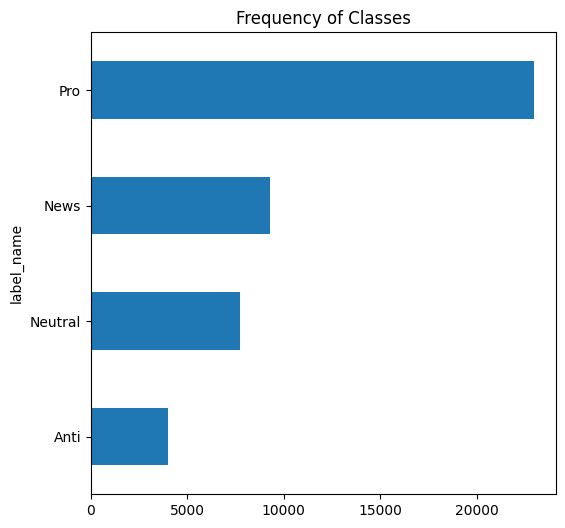

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
label_counts = df['label_name'].value_counts(ascending = True)
label_counts.plot.barh()
plt.title("Frequency of Classes")

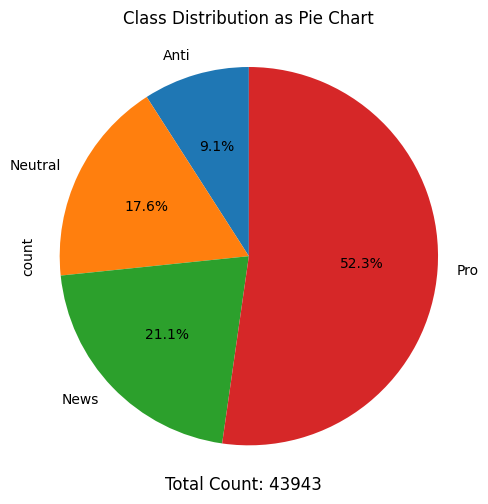

In [5]:
import matplotlib.pyplot as plt

# Get the value counts from your DataFrame
label_counts = df['label_name'].value_counts(ascending=True)
total_count = df.shape[0]  # Calculate the total number of values

# Create a pie chart
plt.figure(figsize=(5, 5))
label_counts.plot.pie(
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,      # Start the pie chart at 90 degrees
    colors=plt.cm.tab10.colors,  # Use a color palette
#     explode=[0.1] * len(label_counts),  # Slightly "explode" each slice
    labels=label_counts.index  # Use the class labels as the legend
)

# Add a title
plt.title("Class Distribution as Pie Chart")

# Equal aspect ratio to ensure the pie is circular
plt.axis('equal') 

# Add total count annotation below the chart
plt.figtext(0.5, 0.01, f'Total Count: {total_count}', ha='center', fontsize=12, color='black')

# Display the chart
plt.tight_layout()
plt.show()

Text(0.5, 1.0, 'Frequency of Classes')

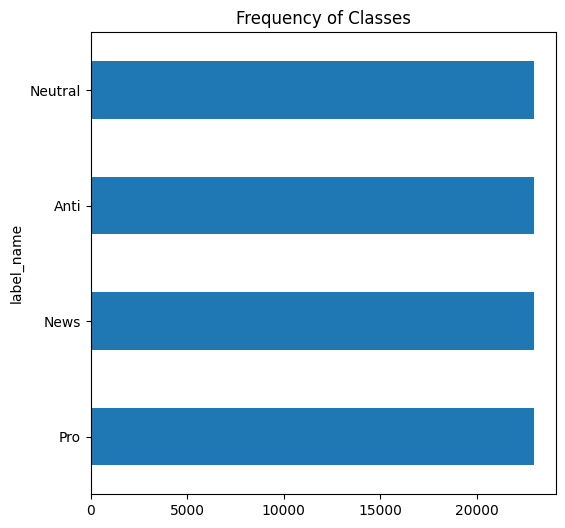

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 6))
label_counts = balanced_train_df['label_name'].value_counts(ascending = True)
label_counts.plot.barh()
plt.title("Frequency of Classes")

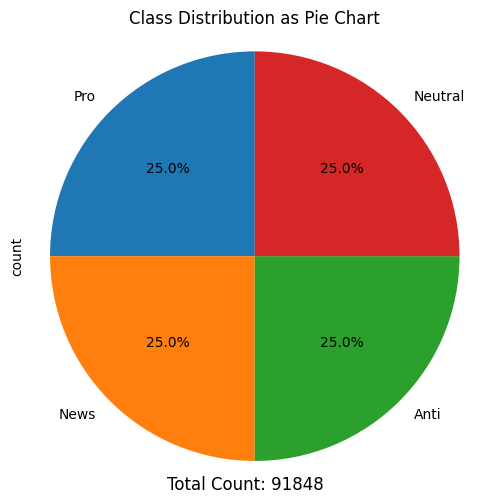

In [7]:
import matplotlib.pyplot as plt

# Get the value counts from your DataFrame
label_counts = balanced_train_df['label_name'].value_counts(ascending=True)
total_count = balanced_train_df.shape[0]  # Calculate the total number of values

# Create a pie chart
plt.figure(figsize=(5, 5))
label_counts.plot.pie(
    autopct='%1.1f%%',  # Show percentages with 1 decimal place
    startangle=90,      # Start the pie chart at 90 degrees
    colors=plt.cm.tab10.colors,  # Use a color palette
#     explode=[0.1] * len(label_counts),  # Slightly "explode" each slice
    labels=label_counts.index  # Use the class labels as the legend
)

# Add a title
plt.title("Class Distribution as Pie Chart")

# Equal aspect ratio to ensure the pie is circular
plt.axis('equal') 

# Add total count annotation below the chart
plt.figtext(0.5, 0.01, f'Total Count: {total_count}', ha='center', fontsize=12, color='black')

# Display the chart
plt.tight_layout()
plt.show()

In [39]:
df.size, balanced_train_df.size

(131829, 275544)

In [37]:
balanced_train_df[balanced_train_df['label_name'] == 'Neutral']

,label,text,label_name
7,1,let ask event hosts americas climate change su...,Neutral
8,1,global warming dope weather,Neutral
10,1,hahahahhahah hate global warming,Neutral
18,1,zero books podcast denied climate change,Neutral
23,1,national geographics climate change doc dicapr...,Neutral
...,...,...,...
91819,1,thought global warming supposed kill years max,Neutral
91827,1,door de global warming de sahara half onderges...,Neutral
91831,1,robin hood help fight climate change,Neutral
91833,1,tries lecture america climate change,Neutral


## Saving the Cleaned Data

In [40]:
# Save the modified DataFrame to a new CSV file
# df.to_csv('cleaned_twitter_sentiment_data.csv', index=False)
balanced_train_df.to_csv('cleaned_twitter_sentiment_data.csv', index=False)